DECEPTIVE REVIEWS DETECTION

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
!nvidia -smi

/bin/bash: nvidia: command not found


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
1.2

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


1.2

In [ ]:
import pandas as pd
import numpy as np
import json, re
from tqdm import tqdm_notebook
from uuid import uuid4

## Torch Modules
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


In [ ]:
import pandas as pd
import re
# import emoji

# Load the dataset into a pandas dataframe.
data = pd.read_csv('/content/sample_data/deceptive-opinion.csv')

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(data.shape[0]))

# Display 10 random rows from the data.
data.sample(10)

Number of training sentences: 1,600



,deceptive,hotel,polarity,source,text
526,deceptive,swissotel,positive,MTurk,This is the hotel for the discriminating busin...
354,truthful,amalfi,positive,TripAdvisor,"What a wonderful experience, super great, help..."
168,truthful,talbott,positive,TripAdvisor,I stayed at the Talbott twice in the last few ...
135,truthful,swissotel,positive,TripAdvisor,My boyfriend and I were amazed by the breathta...
937,truthful,knickerbocker,negative,Web,"Rude, rude, rude! We stayed here on July 4th w..."
1544,deceptive,intercontinental,negative,MTurk,My husband and I stayed at this hotel the week...
1253,deceptive,omni,negative,MTurk,I was extremely disappointed with my stay at t...
237,truthful,affinia,positive,TripAdvisor,We visited for my 40th birthday. We had never ...
478,deceptive,hyatt,positive,MTurk,My experience at the Hyatt Regency Chicago was...
650,deceptive,sofitel,positive,MTurk,"I would like to add a comment, maybe this will..."


In [ ]:
data.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [ ]:
data['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

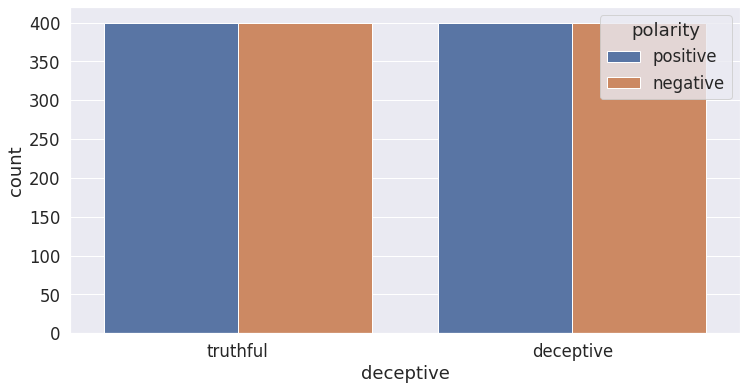

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data['deceptive'],hue='polarity',data=data)

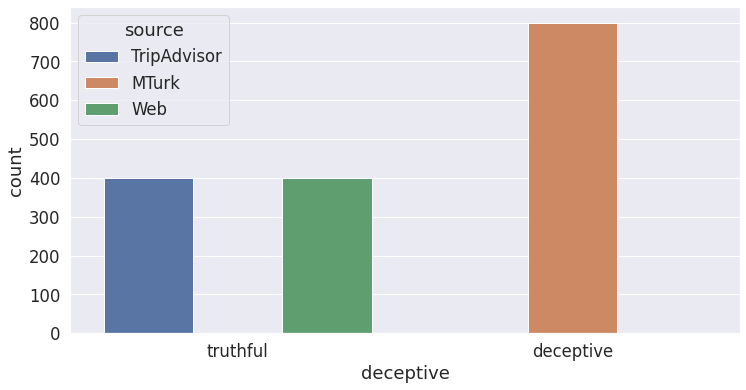

In [ ]:
sns.countplot(x=data['deceptive'],hue='source',data=data)

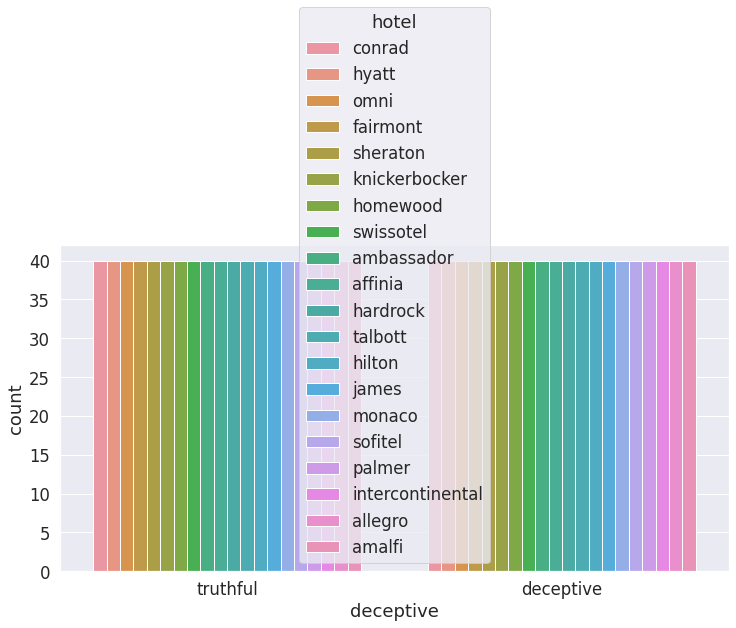

In [ ]:
sns.countplot(x=data['deceptive'],hue='hotel',data=data)

In [ ]:
#drop the feature hotel
df=data.drop(['hotel'],axis=1)

In [ ]:
df.head()

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
df['deceptive'] = np.where(df['deceptive'] == "truthful", 1, 0)

In [ ]:
df.tail()

,deceptive,polarity,source,text
1595,0,negative,MTurk,Problems started when I booked the InterContin...
1596,0,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,0,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,0,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,0,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [ ]:
df.deceptive.value_counts()

1    800
0    800
Name: deceptive, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout,Bidirectional
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#for text cleaning
import string
import re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 

from wordcloud import WordCloud, STOPWORDS


#for visualization
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [ ]:
%%time
def clean_text(txt):
    """""
    cleans the input text in the following steps
    1- replace contractions
    2- removing punctuation
    3- spliting into words
    4- removing stopwords
    5- removing leftover punctuations
    """""
   # contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    #def _get_contractions(contraction_dict):
     #   contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
      #  return contraction_dict, contraction_re

    #def replace_contractions(text):
     #   contractions, contractions_re = _get_contractions(contraction_dict)
      #  def replace(match):
       #     return contractions[match.group(0)]
        #return contractions_re.sub(replace, text)

    # replace contractions and convert to lowercase
    txt = txt.lower()
    #txt = replace_contractions(txt)
    
    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)
    
    # split into words
    words = word_tokenize(txt)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]

    lemmatizer = nltk.stem.WordNetLemmatizer()
    def lemmatize_text(txt):
        return [lemmatizer.lemmatize(w) for w in words]

    cleaned_text = ' '.join(words)
    return cleaned_text
    
df['text'] = df['text'].apply(lambda txt: clean_text(txt))


CPU times: user 1.11 s, sys: 41.4 ms, total: 1.16 s
Wall time: 1.13 s


In [ ]:
df.text.head()

0    stayed one night getaway family thursday tripl...
1    triple rate upgrade view room less also includ...
2    comes little late im finally catching reviews ...
3    omni chicago really delivers fronts spaciousne...
4    asked high floor away elevator got room pleasa...
Name: text, dtype: object

In [ ]:
sentences=df['text'].values
target=df['deceptive'].values

In [ ]:
!pip install transformers==3.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import RobertaConfig,AutoConfig

configuration = RobertaConfig.from_pretrained('roberta-base',output_attentions=False,output_hidden_states=False,num_labels=2)
configuration.hidden_dropout_prob = 0.2
configuration.attention_probs_dropout_prob = 0.1


In [ ]:
#Loading pretrained models
from transformers import (
    BertForSequenceClassification,
#     TFBertForSequenceClassification, 
                          BertTokenizer,
#                           TFRobertaForSequenceClassification,
                          RobertaForSequenceClassification,
                          RobertaTokenizer,
                          XLNetForSequenceClassification,
                          XLNetTokenizer,
                         AdamW)

# BERT
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
                                                                num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                # You can increase this for multi-class tasks.   
                                                                output_attentions = False, # Whether the model returns attentions weights.
                                                                output_hidden_states = False # Whether the model returns all hidden-states.
                                                          )
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# Tell pytorch to run this model on the GPU.
bert_model.cuda()
                                                           

# RoBERTa
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", # 12-layer, 768-hidden, 12-heads, 125M parameters RoBERTa using the BERT-base architecture
                                                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                    # You can increase this for multi-class tasks.   
                                                                    output_attentions = False, # Whether the model returns attentions weights.
                                                                   output_hidden_states = False # Whether the model returns all hidden-states.
                                                                # config =configuration
                                                                )
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model.cuda()

#XLNET
xlnet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", # 12-layer, 768-hidden, 12-heads, 125M parameters RoBERTa using the BERT-base architecture
                                                                    num_labels = 2, # The number of output labels--2 for binary classification.
                                                                                    # You can increase this for multi-class tasks.   
                                                                    output_attentions = False, # Whether the model returns attentions weights.
                                                                    output_hidden_states = False # Whether the model returns all hidden-states.
                                                                )
xlnet_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
# Tell pytorch to run this model on the GPU.
xlnet_model.cuda()


print(' Base models loaded')

- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly iden

 Base models loaded


In [ ]:
#Tokenization
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the text split into tokens.
print('Tokenized BERT: ', bert_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs BERT: ', bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(sentences[0])))

# Print the text split into tokens.
print('Tokenized RoBERT: ', roberta_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs RoBERTa: ', roberta_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0])))


# Print the text split into tokens.
print('Tokenized XLNET: ', xlnet_tokenizer.tokenize(sentences[0]))

# Print the text mapped to token ids.
print('Token IDs XLNET: ', xlnet_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0])))

 Original:  stayed one night getaway family thursday triple aaa rate steal th floor room complete plasma tv bose stereo voss evian water gorgeous bathroomno tub fine us concierge helpful beat location flaw breakfast pricey service slowhours four kids four adults friday morning even though two tables restaurant food good worth wait would return heartbeat gem chicago
Tokenized BERT:  ['stayed', 'one', 'night', 'get', '##away', 'family', 'thursday', 'triple', 'aaa', 'rate', 'steal', 'th', 'floor', 'room', 'complete', 'plasma', 'tv', 'bose', 'stereo', 'voss', 'ev', '##ian', 'water', 'gorgeous', 'bathroom', '##no', 'tub', 'fine', 'us', 'con', '##cier', '##ge', 'helpful', 'beat', 'location', 'flaw', 'breakfast', 'price', '##y', 'service', 'slow', '##ho', '##urs', 'four', 'kids', 'four', 'adults', 'friday', 'morning', 'even', 'though', 'two', 'tables', 'restaurant', 'food', 'good', 'worth', 'wait', 'would', 'return', 'heartbeat', 'gem', 'chicago']
Token IDs BERT:  [4370, 2028, 2305, 2131, 949

In [ ]:
sequence = """Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️"""

bert_tokenized_sequence = bert_tokenizer.tokenize(sequence)
roberta_tokenized_sequence = roberta_tokenizer.tokenize(sequence)
xlnet_tokenized_sequence=xlnet_tokenizer.tokenize(sequence)

print("""Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️""")
print("BERT:", bert_tokenized_sequence)
print("RoBERTa:", roberta_tokenized_sequence)
print("XLNET:",xlnet_tokenized_sequence)

Will Your Hometown Be Taking In Obama’s Refugees? Here’s The List Of Cities Where They’re Being Transplanted 🏙️
BERT: ['will', 'your', 'hometown', 'be', 'taking', 'in', 'obama', '’', 's', 'refugees', '?', 'here', '’', 's', 'the', 'list', 'of', 'cities', 'where', 'they', '’', 're', 'being', 'transplant', '##ed', '[UNK]']
RoBERTa: ['Will', 'ĠYour', 'ĠH', 'ometown', 'ĠBe', 'ĠTaking', 'ĠIn', 'ĠObama', 'âĢ', 'Ļ', 's', 'ĠRefugees', '?', 'ĠHere', 'âĢ', 'Ļ', 's', 'ĠThe', 'ĠList', 'ĠOf', 'ĠCities', 'ĠWhere', 'ĠThey', 'âĢ', 'Ļ', 're', 'ĠBeing', 'ĠTrans', 'pl', 'anted', 'ĠðŁ', 'ı', 'Ļ', 'ï¸ı']
XLNET: ['▁Will', '▁Your', '▁Home', 'town', '▁Be', '▁Taking', '▁In', '▁Obama', '’', 's', '▁Refugees', '?', '▁Here', '’', 's', '▁The', '▁List', '▁Of', '▁Cities', '▁Where', '▁They', '’', 're', '▁Being', '▁Trans', 'plant', 'ed', '▁', '🏙️']


In [ ]:
bert_tokenizer.sep_token, bert_tokenizer.sep_token_id

('[SEP]', 102)

In [ ]:
bert_tokenizer.cls_token, bert_tokenizer.cls_token_id

('[CLS]', 101)

In [ ]:
bert_tokenizer.pad_token, bert_tokenizer.pad_token_id

('[PAD]', 0)

In [ ]:
token_lens = []

for txt in df.text:
    tokens = bert_tokenizer.encode(txt,truncation=True, max_length=512)
    token_lens.append(len(tokens))

**Attention visualization**

In [ ]:
'''
txt="stayed one night getaway family thursday triple aaa rate steal th floor room complete plasma tv bose stereo voss evian water gorgeous bathroomno tub fine us concierge helpful beat location flaw breakfast pricey service slowhours four kids four adults friday morning even though two tables restaurant food good worth wait would return heartbeat gem chicago"
inputs=bert_tokenizer.encode(txt,return_tensors='pt').to(device)
outputs = bert_model(inputs)
attention = outputs[-1]  # Output includes attention weights when output_attentions=True
tokens = bert_tokenizer.convert_ids_to_tokens(inputs[0]) 
'''

'\ntxt="stayed one night getaway family thursday triple aaa rate steal th floor room complete plasma tv bose stereo voss evian water gorgeous bathroomno tub fine us concierge helpful beat location flaw breakfast pricey service slowhours four kids four adults friday morning even though two tables restaurant food good worth wait would return heartbeat gem chicago"\ninputs=bert_tokenizer.encode(txt,return_tensors=\'pt\').to(device)\noutputs = bert_model(inputs)\nattention = outputs[-1]  # Output includes attention weights when output_attentions=True\ntokens = bert_tokenizer.convert_ids_to_tokens(inputs[0]) \n'

In [ ]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''
from bertviz import head_view
head_view(attention, tokens)
'''

'\nfrom bertviz import head_view\nhead_view(attention, tokens)\n'

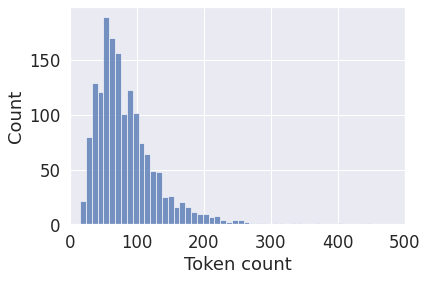

In [ ]:
import seaborn as sns
sns.histplot(token_lens)
plt.xlim([0, 500]);
plt.xlabel('Token count');

In [ ]:
max_len_bert = 0
max_len_roberta = 0
max_len_xlnet=0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids_bert = bert_tokenizer.encode(sent, add_special_tokens=True)
    input_ids_roberta = roberta_tokenizer.encode(sent, add_special_tokens=True)
    input_ids_xlnet=xlnet_tokenizer.encode(sent,add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_bert = max(max_len_bert, len(input_ids_bert))
    max_len_roberta = max(max_len_roberta, len(input_ids_roberta))
    max_len_xlnet = max(max_len_xlnet, len(input_ids_xlnet))

    
print('Max sentence length BERT: ', max_len_bert)
print('Max sentence length RoBERTa: ', max_len_roberta)
print('Max sentence length RoBERTa: ', max_len_xlnet)

Max sentence length BERT:  451
Max sentence length RoBERTa:  440
Max sentence length RoBERTa:  473


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
bert_input_ids = []
bert_attention_masks = []
roberta_input_ids = []
roberta_attention_masks = []
xlnet_input_ids =[]
xlnet_attention_masks=[]
sentence_ids = []
counter = 0

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    bert_encoded_dict = bert_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',
                        truncation =True     # Return pytorch tensors.
                   )
    
    
    roberta_encoded_dict = roberta_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt', 
                        truncation = True    # Return pytorch tensors.
                   )
    xlnet_encoded_dict = xlnet_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt', 
                        truncation = True    # Return pytorch tensors.
                   )
    # Add the encoded sentence to the list.    
    bert_input_ids.append(bert_encoded_dict['input_ids'])
    roberta_input_ids.append(roberta_encoded_dict['input_ids'])
    xlnet_input_ids.append(xlnet_encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    bert_attention_masks.append(bert_encoded_dict['attention_mask'])
    roberta_attention_masks.append(roberta_encoded_dict['attention_mask'])
    xlnet_attention_masks.append(xlnet_encoded_dict['attention_mask'])
    
    # collecting sentence_ids
    sentence_ids.append(counter)
    counter  = counter + 1
    
    
    
# Convert the lists into tensors.
bert_input_ids = torch.cat(bert_input_ids, dim=0)
bert_attention_masks = torch.cat(bert_attention_masks, dim=0)

roberta_input_ids = torch.cat(roberta_input_ids, dim=0)
roberta_attention_masks = torch.cat(roberta_attention_masks, dim=0)

xlnet_input_ids = torch.cat(xlnet_input_ids, dim=0)
xlnet_attention_masks = torch.cat(xlnet_attention_masks, dim=0)

labels = torch.tensor(target)
sentence_ids = torch.tensor(sentence_ids)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[1])
print('Token IDs BERT:', bert_input_ids[1])
print('Token IDs RoBERTa:', roberta_input_ids[1])
print('Token IDs XLNET:', xlnet_input_ids[1])

Original:  triple rate upgrade view room less also included breakfast vouchers great view river lake wrigley bldg tribune bldg major restaurants shopping sightseeing attractions within walking distance large room comfortable bed
Token IDs BERT: tensor([  101,  6420,  3446, 12200,  3193,  2282,  2625,  2036,  2443,  6350,
        29536, 22368,  2015,  2307,  3193,  2314,  2697, 23277,  8004,  3051,
         1038,  6392,  2290, 10969,  1038,  6392,  2290,  2350,  7884,  6023,
        15925,  4402,  2075, 13051,  2306,  3788,  3292,  2312,  2282,  6625,
         2793,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    

In [ ]:
from torch.utils.data import TensorDataset, random_split
# function to seed the script globally
torch.manual_seed(1)

# Combine the training inputs into a TensorDataset.
bert_dataset = TensorDataset(sentence_ids, bert_input_ids, bert_attention_masks, labels)
roberta_dataset = TensorDataset(roberta_input_ids, roberta_attention_masks, labels)
xlnet_dataset = TensorDataset(xlnet_input_ids, xlnet_attention_masks, labels)

In [ ]:
# function to remove sentice ids from the tensor dataset post train test split
def index_remover(tensordata):
    input_ids = []
    attention_masks = []
    labels = []
   
    for a,b,c,d in tensordata:
        input_ids.append(b.tolist())
        attention_masks.append(c.tolist())
        labels.append(d.tolist())
        
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    labels = torch.tensor(labels)
    
    final_dataset =  TensorDataset(input_ids, attention_masks, labels)
    return final_dataset
        
# check
trial_dataset =  index_remover(bert_dataset)
trial_dataset[0]
# yes we were able to remove the sentence id from the data without disturbing the data format
#assigning sentences and labels to separate variables
sentences = df["text"].values
labels = df["deceptive"].values

In [ ]:
# Create a 80-20 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(bert_dataset))
val_size = len(bert_dataset) - train_size

# Divide the dataset by randomly selecting samples.
bert_train_dataset, bert_val_dataset = random_split(bert_dataset, [train_size, val_size])
roberta_train_dataset, roberta_val_dataset = random_split(roberta_dataset, [train_size, val_size])
xlnet_train_dataset,xlnet_val_dataset =random_split(xlnet_dataset, [train_size, val_size])

# Checking whether the distribution of target is consitent across both the sets
sentence_ids_list_valid = []
for a,b,c,d in bert_val_dataset:
  sentence_ids_list_valid.append(a.tolist())

# removing sentence ids from tensor dataset so that it can be used for training 
bert_train_dataset = index_remover(bert_train_dataset)
bert_val_dataset = index_remover(bert_val_dataset)


# Checking whether the distribution of target is consitent across both the sets
label_temp_list = []
for a,b,c in bert_train_dataset:
  label_temp_list.append(c)

print('{:>5,} training samples'.format(train_size))
print('{:>5,} training samples with reviews'.format(sum(label_temp_list)))


label_temp_list = []
for a,b,c in bert_val_dataset:
  label_temp_list.append(c)

print('{:>5,} validation samples'.format(val_size))
print('{:>5,} validation samples with reviews'.format(sum(label_temp_list)))

1,280 training samples
  640 training samples with reviews
  320 validation samples
  160 validation samples with reviews


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
bert_train_dataloader = DataLoader(
            bert_train_dataset,  # The training samples.
            sampler = RandomSampler(bert_train_dataset), # Select batches randomly
            batch_size = batch_size, # Trains with this batch size.
            num_workers=3
        )
roberta_train_dataloader = DataLoader(
            roberta_train_dataset,  # The training samples.
            sampler = RandomSampler(roberta_train_dataset), # Select batches randomly
            batch_size = batch_size, # Trains with this batch size.
            num_workers =3
        )
xlnet_train_dataloader = DataLoader(
            xlnet_train_dataset,  # The training samples.
            sampler = RandomSampler(xlnet_train_dataset), # Select batches randomly
            batch_size = 15, # Trains with this batch size.
            num_workers =3
        )
# For validation the order doesn't matter, so we'll just read them sequentially.
bert_validation_dataloader = DataLoader(
            bert_val_dataset, # The validation samples.
            sampler = SequentialSampler(bert_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers =3
)
roberta_validation_dataloader = DataLoader(
            roberta_val_dataset, # The validation samples.
            sampler = SequentialSampler(roberta_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers =3
        )
xlnet_validation_dataloader = DataLoader(
            xlnet_val_dataset, # The validation samples.
            sampler = SequentialSampler(xlnet_val_dataset), # Pull out batches sequentially.
            batch_size = batch_size, # Evaluate with this batch size.
            num_workers =3
        )           

In [ ]:
# Get all of the roberta_model's parameters as a list of tuples.
params = list(roberta_model.named_parameters())

print('The RoBERTa model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The RoBERTa model has 203 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (50265, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias         

In [ ]:
# Get all of the xlnet_model's parameters as a list of tuples.
params = list(xlnet_model.named_parameters())

print('The XLNET model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The XLNET model has 210 different named parameters.

==== Embedding Layer ====

transformer.mask_emb                                     (1, 1, 768)
transformer.word_embedding.weight                       (32000, 768)
transformer.layer.0.rel_attn.q                          (768, 12, 64)
transformer.layer.0.rel_attn.k                          (768, 12, 64)
transformer.layer.0.rel_attn.v                          (768, 12, 64)

==== First Transformer ====

transformer.layer.0.rel_attn.o                          (768, 12, 64)
transformer.layer.0.rel_attn.r                          (768, 12, 64)
transformer.layer.0.rel_attn.r_r_bias                       (12, 64)
transformer.layer.0.rel_attn.r_s_bias                       (12, 64)
transformer.layer.0.rel_attn.r_w_bias                       (12, 64)
transformer.layer.0.rel_attn.seg_embed                   (2, 12, 64)
transformer.layer.0.rel_attn.layer_norm.weight                (768,)
transformer.layer.0.rel_attn.layer_norm.bias             

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
#bert_optimizer = torch.optim.AdamW(bert_model.parameters(),
 #                 lr = 5e-5, # args.learning_rate - default is 5e-5
  #                eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
   #             )
param_optimizer = list(bert_model.named_parameters())
no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
optimizer_parameters = [{'params': [p for n, p in param_optimizer 
                                    if not any(nd in n for nd in no_decay)],'weight_decay':0.001},
                        {'params': [p for n, p in param_optimizer 
                                    if any(nd in n for nd in no_decay)],'weight_decay':0.0}]

print('Preparing the optimizer...')
#optimizer 
bert_optimizer = AdamW(optimizer_parameters, lr=5e-5)

print('Preparing the optimizer...')

roberta_optimizer = torch.optim.AdamW(roberta_model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

xlnet_optimizer = torch.optim.AdamW(xlnet_model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

Preparing the optimizer...
Preparing the optimizer...


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 2,I have already seen that the model starts overfitting beyound 2 epochs
epochs = 5

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(bert_train_dataloader) * epochs

# Create the learning rate scheduler.
bert_scheduler = get_linear_schedule_with_warmup(bert_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

roberta_scheduler = get_linear_schedule_with_warmup(roberta_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
xlnet_scheduler = get_linear_schedule_with_warmup(xlnet_optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
next(iter(bert_train_dataloader))

[tensor([[  101,  2684,  2359,  ...,     0,     0,     0],
         [  101,  3942,  3190,  ...,     0,     0,     0],
         [  101,  4370, 18168,  ...,  2052,  5791,   102],
         ...,
         [  101,  2769, 25933,  ...,     0,     0,     0],
         [  101,  2428,  9223,  ...,     0,     0,     0],
         [  101,  4370,  2093,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
         0, 1, 0, 1, 0, 0, 0, 0])]

In [ ]:
def loss_fn(outputs, targets):
    return nn.BCEWithLogitsLoss()(outputs, targets.float())

In [ ]:
from torch.nn.modules.loss import CrossEntropyLoss
import random
from sklearn.metrics import f1_score,precision_score,recall_score

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
bert_training_stats = []
y_pred_list = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the bert_model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-bert_model-train-do-in-pytorch)
    bert_model.train()

    # For each batch of training data...
    for step, batch in enumerate(bert_train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(bert_train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        bert_model.zero_grad()        

        # Perform a forward pass (evaluate the bert_model on this training batch).
        # The documentation for this `bert_model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/bert_model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # are given and what flags are set. For our usage here, it returns
        # the loss (because we provided labels) and the "logits"--the bert_model
        # outputs prior to activation.
        loss, logits = bert_model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        
       # criterion = torch.nn.CrossEntropyLoss(weight=weight,reduction='mean')
        b_labels1=nn.functional.one_hot(b_labels, num_classes=2)
        
        loss1 = loss_fn(logits,b_labels1)
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss1.item()

        # Perform a backward pass to calculate the gradients.
        loss1.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The bert_optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        bert_optimizer.step()

        # Update the learning rate.
        bert_scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(bert_train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the bert_model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    bert_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_f1_score =0
    predlist =[]
    lbllist =[]
    total_logits=[]
    # Evaluate data for one epoch
    for batch in bert_validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # Get the "logits" output by the bert_model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = bert_model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            #Converting the labels to one hot to sync with same shape as logits
            b_labels1=nn.functional.one_hot(b_labels, num_classes=2)


           # weight=torch.FloatTensor([0.5,0.5]).to(device)
            criterion = torch.nn.CrossEntropyLoss()
        #using bcewithlogitloss that has inbuilt sigmoid function with logits
            loss1 = loss_fn(logits, b_labels1)
                 
           # y_pred_list.append(y_pred.cpu().numpy())
       
        #y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
       # print('y_pred_list:',y_pred_list)   
        # Accumulate the validation loss.
        total_eval_loss += loss1.item()

    #Converting for predictions by applying sigmoid to logits
        pred_logits_sigmoid=torch.sigmoid(logits)
        y_pred=torch.round(pred_logits_sigmoid)

        # Move logits and labels to CPU
        logits_pred = y_pred.detach().cpu().numpy()
        label_ids1 = b_labels.to('cpu').numpy()
        logits=logits.detach().cpu().numpy()
        #For confusion matrix and classification report to work we need same dimensions.
        label_ids = b_labels1.to('cpu').numpy()
        pred_logits_sigmoid=pred_logits_sigmoid.detach().cpu().numpy()

        #print("loss1:",loss1)

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids1)

        #print(predictions)
        predictions=np.argmax(logits_pred, axis=1)
        y_test=np.argmax(label_ids,axis=1)
        predlist.extend(predictions)
        lbllist.extend(y_test)
        total_f1_score += f1_score(predlist,lbllist, average = 'micro')  

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(bert_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    #f1 score

    avg_f1_score =total_f1_score/len(bert_validation_dataloader)
    print("  F1 score: {0:.2f}".format(avg_f1_score))

    #classification report
    print(classification_report(lbllist, predlist))  

    #confusion matrix
    cm = confusion_matrix(lbllist,predlist)
    # constant for classes
    print(cm)       
   
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(bert_validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    
    # Record all statistics from this epoch.
    bert_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.59
  Training epcoh took: 0:00:52

Running Validation...
  Accuracy: 0.78
  F1 score: 0.80
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       160
           1       0.94      0.61      0.74       160

    accuracy                           0.79       320
   macro avg       0.83      0.79      0.78       320
weighted avg       0.83      0.79      0.78       320

[[154   6]
 [ 62  98]]
  Validation Loss: 0.49
  Validation took: 0:00:05

======== Epoch 2 / 5 ========
Training...

  Average training loss: 0.30
  Training epcoh took: 0:00:52

Running Validation...
  Accuracy: 0.84
  F1 score: 0.84
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       160
           1       0.89      0.79      0.83       160

    accuracy                           0.84       320
   macro avg       0.85      0.84      0.84       320
wei

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=bert_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.59,0.49,0.78,0:00:52,0:00:05
2,0.30,0.38,0.84,0:00:52,0:00:05
3,0.17,0.46,0.84,0:00:52,0:00:05
4,0.10,0.58,0.82,0:00:52,0:00:05
5,0.05,0.55,0.85,0:00:52,0:00:05


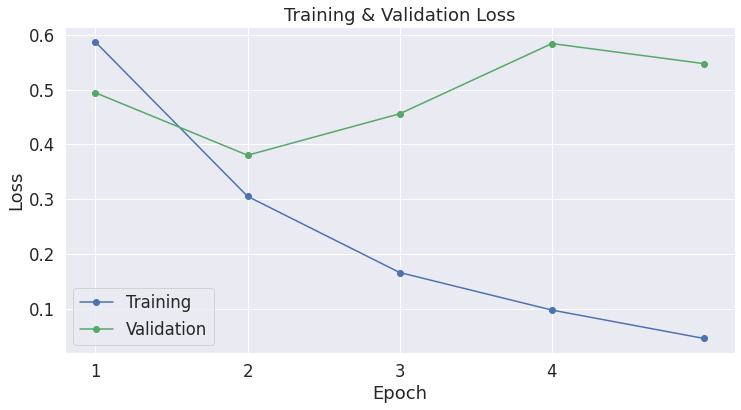

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:

del bert_model
del bert_optimizer
torch.cuda.empty_cache()


In [ ]:
#For Roberta
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 100

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
roberta_training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the roberta_model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-roberta_model-train-do-in-pytorch)
    roberta_model.train()

    # For each batch of training data...
    for step, batch in enumerate(roberta_train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(roberta_train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        roberta_model.zero_grad()        

        # Perform a forward pass (evaluate the roberta_model on this training batch).
        # The documentation for this `roberta_model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/roberta_model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # are given and what flags are set. For our usage here, it returns
        # the loss (because we provided labels) and the "logits"--the roberta_model
        # outputs prior to activation.
        loss, logits = roberta_model(b_input_ids, 
#                              token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        b_labels1=nn.functional.one_hot(b_labels, num_classes=2)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        
        loss1 = loss_fn(logits,b_labels1)
        total_train_loss += loss1.item()

        # Perform a backward pass to calculate the gradients.
        loss1.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(roberta_model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The roberta_optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        roberta_optimizer.step()

        # Update the learning rate.
        roberta_scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(roberta_train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the roberta_model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    roberta_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_f1_score=0
    predlist =[]
    lbllist =[]
    total_logits=[]
    

    # Evaluate data for one epoch
    for batch in roberta_validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # Get the "logits" output by the roberta_model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = roberta_model(b_input_ids, 
#                                    token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            #Converting the labels to one hot to sync with same shape as logits
            b_labels1=nn.functional.one_hot(b_labels, num_classes=2)
            #using bcewithlogitloss that has inbuilt sigmoid function with logits
            loss1 = loss_fn(logits, b_labels1)
            
        # Accumulate the validation loss.
        total_eval_loss += loss1.item()
        #Converting for predictions by applying sigmoid to logits
        pred_logits_sigmoid=torch.sigmoid(logits)
        y_pred=torch.round(pred_logits_sigmoid)

        # Move logits and labels to CPU
        logits_pred = y_pred.detach().cpu().numpy()
        label_ids1 = b_labels.to('cpu').numpy()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        #For confusion matrix and classification report to work we need same dimensions.
        label_ids = b_labels1.to('cpu').numpy()
        pred_logits_sigmoid=pred_logits_sigmoid.detach().cpu().numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids1)
        #print(predictions)
        predictions=np.argmax(logits_pred, axis=1)
        y_test=np.argmax(label_ids,axis=1)
        predlist.extend(predictions)
        lbllist.extend(y_test)
        total_f1_score += f1_score(predlist,lbllist, average = 'micro') 
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(roberta_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

      #f1 score

    avg_f1_score =total_f1_score/len(bert_validation_dataloader)
    print("  F1 score: {0:.2f}".format(avg_f1_score))

    #classification report
    print(classification_report(lbllist, predlist))  

    #confusion matrix
    cm = confusion_matrix(lbllist,predlist)
    # constant for classes
    print(cm)

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(roberta_validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    roberta_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 5 ========
Training...

  Average training loss: 0.68
  Training epcoh took: 0:00:52

Running Validation...
  Accuracy: 0.70
  F1 score: 0.69
              precision    recall  f1-score   support

           0       0.89      0.48      0.62       162
           1       0.64      0.94      0.76       158

    accuracy                           0.70       320
   macro avg       0.76      0.71      0.69       320
weighted avg       0.76      0.70      0.69       320

[[ 77  85]
 [ 10 148]]
  Validation Loss: 0.60
  Validation took: 0:00:05

======== Epoch 2 / 5 ========
Training...

  Average training loss: 0.49
  Training epcoh took: 0:00:52

Running Validation...
  Accuracy: 0.80
  F1 score: 0.79
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       162
           1       0.84      0.74      0.79       158

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
wei

In [ ]:
'''
del roberta_model
del roberta_optimizer
torch.cuda.empty_cache()
'''

'\ndel roberta_model\ndel roberta_optimizer\ntorch.cuda.empty_cache()\n'

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=roberta_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.68,0.60,0.70,0:00:52,0:00:05
2,0.49,0.47,0.80,0:00:52,0:00:05
3,0.35,0.41,0.82,0:00:52,0:00:05
4,0.28,0.41,0.82,0:00:52,0:00:05
5,0.21,0.43,0.83,0:00:52,0:00:05


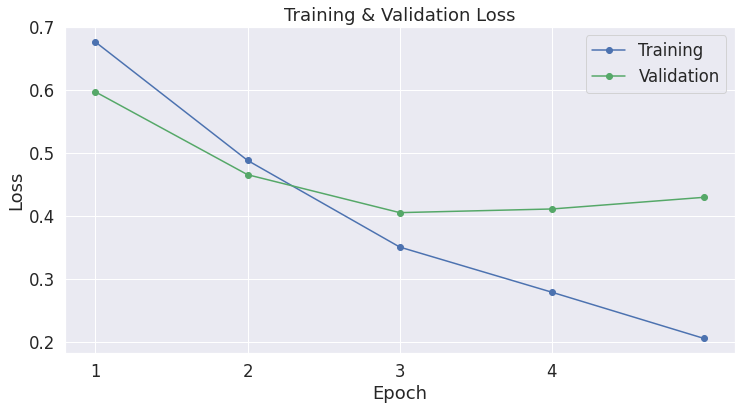

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
xlnet_model

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e

In [ ]:
EPOCHS = 5

param_optimizer = list(xlnet_model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
                                {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay':0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5)

total_steps = len(xlnet_train_dataloader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps)

In [ ]:
data = next(iter(xlnet_validation_dataloader))


Revised xlnet

In [ ]:

param_optimizer = list(xlnet_model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=2e-5)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from tqdm import tqdm,trange

In [ ]:
import random
from sklearn.metrics import f1_score,precision_score,recall_score
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 100

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
xlnet_training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the roberta_model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-roberta_model-train-do-in-pytorch)
    xlnet_model.train()

    # For each batch of training data...
    for step, batch in enumerate(xlnet_train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(xlnet_train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        xlnet_model.zero_grad()        

        # Perform a forward pass (evaluate the roberta_model on this training batch).
        # The documentation for this `roberta_model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/roberta_model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # are given and what flags are set. For our usage here, it returns
        # the loss (because we provided labels) and the "logits"--the roberta_model
        # outputs prior to activation.
        loss, logits = xlnet_model(b_input_ids, 
#                              token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        b_labels1=nn.functional.one_hot(b_labels, num_classes=2)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        
        loss1 = loss_fn(logits,b_labels1)
        total_train_loss += loss1.item()

        # Perform a backward pass to calculate the gradients.
        loss1.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(xlnet_model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The roberta_optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        xlnet_optimizer.step()

        # Update the learning rate.
        xlnet_scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(xlnet_train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the roberta_model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    xlnet_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    total_f1_score=0
    # Evaluate data for one epoch
    for batch in xlnet_validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # Get the "logits" output by the roberta_model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = xlnet_model(b_input_ids, 
#                                    token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            #Converting the labels to one hot to sync with same shape as logits
            b_labels1=nn.functional.one_hot(b_labels, num_classes=2)
            #using bcewithlogitloss that has inbuilt sigmoid function with logits
            loss1 = loss_fn(logits, b_labels1)
            
        # Accumulate the validation loss.
        total_eval_loss += loss1.item()
        #Converting for predictions by applying sigmoid to logits
        pred_logits_sigmoid=torch.sigmoid(logits)
        y_pred=torch.round(pred_logits_sigmoid)

        # Move logits and labels to CPU
        logits_pred = y_pred.detach().cpu().numpy()
        label_ids1 = b_labels.to('cpu').numpy()
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        #For confusion matrix and classification report to work we need same dimensions.
        label_ids = b_labels1.to('cpu').numpy()
        pred_logits_sigmoid=pred_logits_sigmoid.detach().cpu().numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids1)
        #print(predictions)
        predictions=np.argmax(logits_pred, axis=1)
        y_test=np.argmax(label_ids,axis=1)
        total_f1_score += f1_score(predictions,y_test, average = 'micro') 
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(xlnet_validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

      #f1 score

    avg_f1_score =total_f1_score/len(xlnet_validation_dataloader)
    print("  F1 score: {0:.2f}".format(avg_f1_score))

    #classification report
    print(classification_report(y_test, predictions))  

    #confusion matrix
    cm = confusion_matrix(y_test,predictions)
    # constant for classes
    print(cm)

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(xlnet_validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    xlnet_training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 5 ========
Training...
  Batch    40  of     86.    Elapsed: 0:00:43.
  Batch    80  of     86.    Elapsed: 0:01:26.

  Average training loss: 0.70
  Training epcoh took: 0:01:32

Running Validation...
  Accuracy: 0.69
  F1 score: 0.66
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        17
           1       0.71      0.33      0.45        15

    accuracy                           0.62        32
   macro avg       0.66      0.61      0.58        32
weighted avg       0.65      0.62      0.59        32

[[15  2]
 [10  5]]
  Validation Loss: 0.65
  Validation took: 0:00:12

======== Epoch 2 / 5 ========
Training...
  Batch    40  of     86.    Elapsed: 0:00:43.
  Batch    80  of     86.    Elapsed: 0:01:26.

  Average training loss: 0.53
  Training epcoh took: 0:01:32

Running Validation...
  Accuracy: 0.80
  F1 score: 0.80
              precision    recall  f1-score   support

           0       0.70      0.82   

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=xlnet_training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.70,0.65,0.69,0:01:32,0:00:12
2,0.53,0.44,0.80,0:01:32,0:00:12
3,0.36,0.48,0.79,0:01:32,0:00:12
4,0.36,0.48,0.79,0:01:32,0:00:12
5,0.35,0.48,0.79,0:01:32,0:00:12


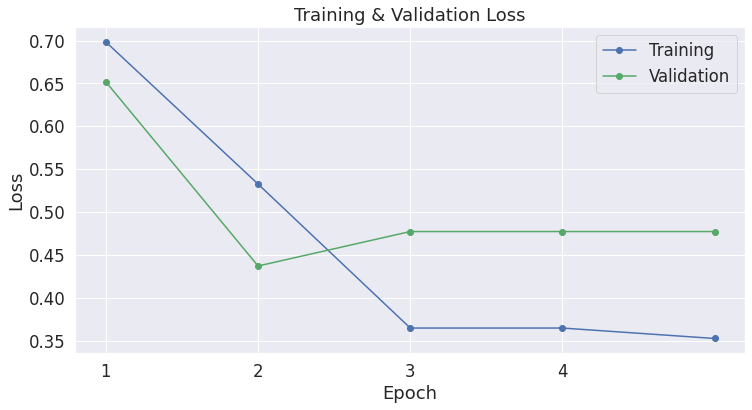

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()